<a href="https://colab.research.google.com/github/dsethia1/Gesture-Recognition/blob/main/Data_Analysis_Six_Sensors_Four_Gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.15.0


In [ ]:
!pip install scikeras==0.9.0

In [ ]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def gesture_all_sensors(gesture, sensor_number):
    #
    time_window = 40
    gesture_training = []
    for i in range(len(gesture[:,sensor_number]) - time_window):
        gesture_training.append(gesture[:,sensor_number][i:i+time_window])
    return gesture_training

In [ ]:
import os

folder_path = '/content/drive/My Drive/SIP24/Gesture_Data'
dirs = glob(os.path.join(folder_path,'**', '*Stroke_05.23.22*'))
print(dirs)
all_data = []

for path in dirs:
    files_path = glob(path + '*')
    for num_path in files_path:
        temp_data = []
        with open(num_path, 'r') as f:
            for _, line in enumerate(f):
                if len(line) > 150:
                    temp_data.append(line.split())
#                     print(line.split())
#                     temp_data.append(line.split()[0].split(','))
        all_data.extend(temp_data)

all_data_stroke = np.array(all_data)
sensor_stroke = all_data_stroke[:, [1,2,3,4,5,6,7,8,9,11]]
print("all_data_stroke.shape:", all_data_stroke.shape)
all_data_stroke_length = len(all_data_stroke)
# print("all_data.length:", all_data_length)
all_data_stroke = all_data_stroke[:, 5:11]

df_stroke_df = pd.DataFrame(all_data_stroke, columns = ['sensor1','sensor2','sensor3','sensor4','sensor5','sensor6'])
df_stroke_label = df_stroke_df.assign(label=[1]*len(df_stroke_df))
df_stroke_np = (df_stroke_label[["sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "label"]]).to_numpy().astype(int)
print("df_stroke_np.shape:", df_stroke_np.shape)

df_stroke_np


['/content/drive/My Drive/SIP24/Gesture_Data/Stroke_05.23.22/Stroke_05.23.22_event18_1.csv']
all_data_stroke.shape: (3787, 23)
df_stroke_np.shape: (3787, 7)


array([[  3,   4,   3, ...,   3,   3,   1],
       [  3, 299,   3, ...,   4,   3,   1],
       [  4, 420,   3, ...,   4,   4,   1],
       ...,
       [  3,   3,   3, ...,   3,   4,   1],
       [  4,   3,   3, ...,   3,   4,   1],
       [  3,   4,   3, ...,   4,   4,   1]])

In [ ]:
gesture = df_stroke_np
label = 0

df_stroke_X_List = []
for col in range(6):
    df_stroke_X_List.append(np.array(gesture_all_sensors(gesture, col)))

df_stroke_X = np.concatenate(tuple((s for s in df_stroke_X_List)), axis=0)
df_stroke_y = np.array([label] * len(df_stroke_X))
df_stroke_X.shape, df_stroke_y.shape

((22482, 40), (22482,))

Text(0.5, 1.0, 'Stroke Data Sensors')

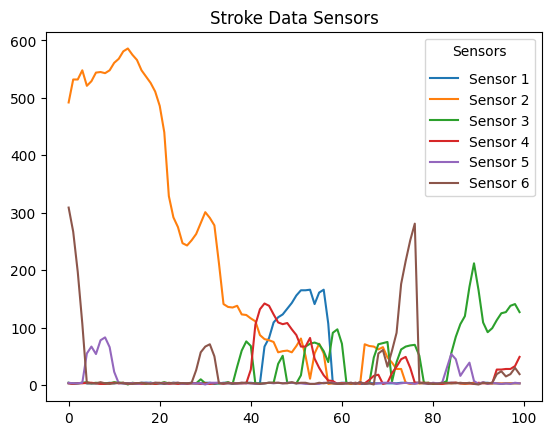

In [ ]:
for i in range(6):
  plt.plot(df_stroke_np[2200:2300,i])

plt.plot()

legend_labels = [f'Sensor {i}' for i in range(1,7)]
legend = plt.legend(legend_labels, title="Sensors", title_fontsize=10)
legend._legend_box.sep = 10
plt.title("Stroke Data Sensors")

In [ ]:

# dirs = glob('*/')
folder_path = '/content/drive/My Drive/SIP24/Gesture_Data'
dirs = glob(os.path.join(folder_path, '**', '*Squeeze_05.23.22*'))
print(dirs)
all_data = []

for path in dirs:
    files_path = glob(path + '*')
    for num_path in files_path:
        temp_data = []
        with open(num_path, 'r') as f:
            for _, line in enumerate(f):
                if len(line) > 150:
                    temp_data.append(line.split())
#                     print(line.split())
#                     temp_data.append(line.split()[0].split(','))
        all_data.extend(temp_data)

all_data_Squeeze = np.array(all_data)
sensor_Squeeze = all_data_Squeeze[:, [1,2,3,4,5,6,7,8,9,11]]
# print("all_data_Squeeze.shape:", all_data_Squeeze.shape)
all_data_Squeeze_length = len(all_data_Squeeze)
# print("all_data.length:", all_data_length)
all_data_Squeeze = all_data_Squeeze[:, 1:11]

df_Squeeze = pd.DataFrame(all_data_Squeeze, columns = ['time','click1', 'click2', 'click3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6'])
df_Squeeze = df_Squeeze.assign(label=[2]*len(df_Squeeze))

df_Squeeze = (df_Squeeze[["sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "label"]]).to_numpy().astype(int)
print("df_Squeeze.shape:", df_Squeeze.shape)

df_Squeeze


['/content/drive/My Drive/SIP24/Gesture_Data/Squeeze_05.23.22/Squeeze_05.23.22_event18_4.csv']
df_Squeeze.shape: (4903, 7)


array([[  3,   4,   2, ...,   3, 164,   2],
       [  2,   4,   3, ...,   3, 170,   2],
       [  3,   3,   3, ...,   3, 167,   2],
       ...,
       [  3,   3,   4, ...,   4,   3,   2],
       [  3,   3,   0, ...,   3,   3,   2],
       [  3,   4,   3, ...,   3,   3,   2]])

In [ ]:
gesture = df_Squeeze
label = 1

df_Squeeze_X_List = []
for col in range(6):
    df_Squeeze_X_List.append(np.array(gesture_all_sensors(gesture, col)))

df_Squeeze_X = np.concatenate(tuple((s for s in df_Squeeze_X_List)), axis=0)
df_Squeeze_y = np.array([label] * len(df_Squeeze_X))
df_Squeeze_X.shape, df_Squeeze_y.shape

((29178, 40), (29178,))

Text(0.5, 1.0, 'Squeeze Data Sensors')

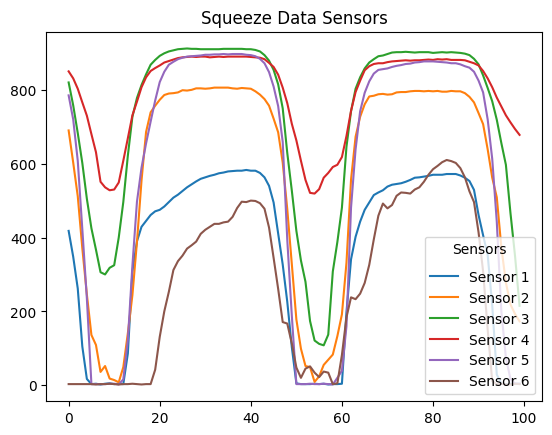

In [ ]:
for i in range(6):
  plt.plot(df_Squeeze[2200:2300,i])

plt.plot()

legend_labels = [f'Sensor {i}' for i in range(1,7)]
legend = plt.legend(legend_labels, title="Sensors", title_fontsize=10)
legend._legend_box.sep = 10
plt.title("Squeeze Data Sensors")

In [ ]:


folder_path = '/content/drive/My Drive/SIP24/Gesture_Data'
dirs = glob(os.path.join(folder_path, '**', '*Tap_05.23.22*'))
print(dirs)
all_data = []

for path in dirs:
    files_path = glob(path + '*')
    for num_path in files_path:
        temp_data = []
        with open(num_path, 'r') as f:
            for _, line in enumerate(f):
                if len(line) > 150:
                    temp_data.append(line.split())
#                     print(line.split())
#                     temp_data.append(line.split()[0].split(','))
        all_data.extend(temp_data)

all_data_Tap = np.array(all_data)
sensor_Tap = all_data_Tap[:, [1,2,3,4,5,6,7,8,9,11]]
print("all_data_Tap.shape:", all_data_Tap.shape)
all_data_Tap_length = len(all_data_Tap)
# print("all_data.length:", all_data_length)
all_data_Tap = all_data_Tap[:, 1:11]

df_Tap = pd.DataFrame(all_data_Tap, columns = ['time','click1', 'click2', 'click3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6'])
df_Tap = df_Tap.assign(label=[3]*len(df_Tap))

df_Tap = (df_Tap[["sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "label"]]).to_numpy().astype(int)
print(df_Tap.shape)

df_Tap


['/content/drive/My Drive/SIP24/Gesture_Data/Tap_05.23.22/Tap_05.23.22_event18_2.csv']
all_data_Tap.shape: (3550, 23)
(3550, 7)


array([[  1, 264,   3, ...,   2,   3,   3],
       [  3, 433,   3, ...,   3,   3,   3],
       [  4, 497,   3, ...,   2,   3,   3],
       ...,
       [  3,   2,   3, ...,   3,   3,   3],
       [  2,   3,   3, ...,   3,   2,   3],
       [  4,   4,   3, ...,   2,   2,   3]])

In [ ]:
gesture = df_Tap
label = 2

df_Tap_X_List = []
for col in range(6):
    df_Tap_X_List.append(np.array(gesture_all_sensors(gesture, col)))

df_Tap_X = np.concatenate(tuple((s for s in df_Tap_X_List)), axis=0)
df_Tap_y = np.array([label] * len(df_Tap_X))
df_Tap_X.shape, df_Tap_y.shape

((21060, 40), (21060,))

Text(0.5, 1.0, 'Tap Data Sensors')

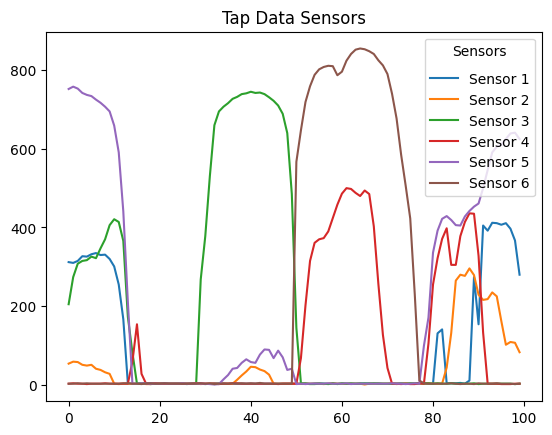

In [ ]:

for i in range(6):
  plt.plot(df_Tap[2200:2300, i])

plt.plot()

legend_labels = [f'Sensor {i}' for i in range(1,7)]
legend = plt.legend(legend_labels, title="Sensors", title_fontsize=10)
legend._legend_box.sep = 10
plt.title("Tap Data Sensors")

In [ ]:
folder_path = '/content/drive/My Drive/SIP24/Gesture_Data'
dirs = glob(os.path.join(folder_path, '**', '*NoTouch_05.23.22*'))
print(dirs)
all_data = []

for path in dirs:
    files_path = glob(path + '*')
    for num_path in files_path:
        temp_data = []
        with open(num_path, 'r') as f:
            for _, line in enumerate(f):
                if len(line) > 150:
                    temp_data.append(line.split())
#                     print(line.split())
#                     temp_data.append(line.split()[0].split(','))
        all_data.extend(temp_data)

all_data_notouch = np.array(all_data)
sensor_notouch = all_data_notouch[:, [1,2,3,4,5,6,7,8,9,11]]
# print("all_data_notouch.shape:", all_data_notouch.shape)
all_data_notouch_length = len(all_data_notouch)
all_data_notouch = all_data_notouch[:, 1:11]

df_notouch = pd.DataFrame(all_data_notouch, columns = ['time','click1', 'click2', 'click3','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6'])
df_notouch = df_notouch.assign(label=[4]*len(df_notouch))

df_notouch = (df_notouch[["sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "label"]])
df_notouch = df_notouch.iloc[df_notouch.index.repeat(2),:] # I doubled the size of df_notouch
# .reset_index()
df_notouch = df_notouch.to_numpy().astype(int)

print(df_notouch.shape)

# # Preparing feature vector and label
# notouch_label = len(df_notouch)*[2]
# notouch_label = np.array(notouch_label)
# print(notouch_label.shape)
# #*****************************#
# notouch_sensor = np.array(all_data_notouch[:,4:]).astype(np.float)
# print(notouch_sensor.shape)

df_notouch


['/content/drive/My Drive/SIP24/Gesture_Data/NoTouch_05.23.22/NoTouch_05.23.22_event18_3.csv']
(4906, 7)


array([[3, 3, 3, ..., 3, 4, 4],
       [3, 3, 3, ..., 3, 4, 4],
       [3, 3, 3, ..., 3, 3, 4],
       ...,
       [4, 3, 4, ..., 3, 3, 4],
       [2, 3, 3, ..., 3, 3, 4],
       [2, 3, 3, ..., 3, 3, 4]])

In [ ]:
gesture = df_notouch
label = 3

df_notouch_X_List = []
for col in range(6):
    df_notouch_X_List.append(np.array(gesture_all_sensors(gesture, col)))

df_notouch_X = np.concatenate(tuple((s for s in df_notouch_X_List)), axis=0)
df_notouch_y = np.array([label] * len(df_notouch_X))
df_notouch_X.shape, df_notouch_y.shape

((29196, 40), (29196,))

Text(0.5, 1.0, 'No Touch Data Sensors')

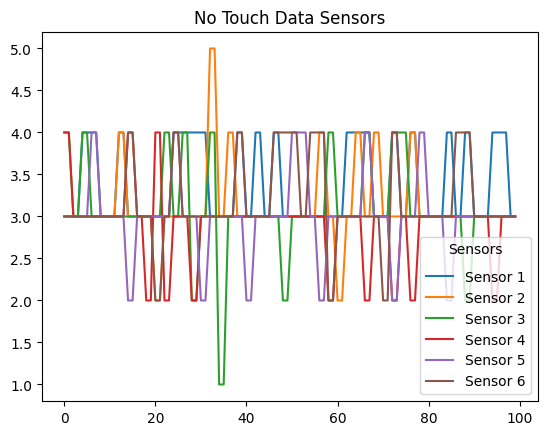

In [ ]:
for i in range(6):
  plt.plot(df_notouch[1000:1100, i])

plt.plot()

legend_labels = [f'Sensor {i}' for i in range(1,7)]
legend = plt.legend(legend_labels, title="Sensors", title_fontsize=10)
legend._legend_box.sep = 10
plt.title("No Touch Data Sensors")

In [ ]:

X = np.concatenate((df_stroke_X, df_Squeeze_X, df_Tap_X, df_notouch_X), axis=0)
y = np.concatenate((df_stroke_y, df_Squeeze_y, df_Tap_y, df_notouch_y), axis=0)
y.shape, X.shape

((101916,), (101916, 40))

In [ ]:
df_stroke_X

array([[3, 3, 4, ..., 3, 4, 3],
       [3, 4, 4, ..., 4, 3, 2],
       [4, 4, 3, ..., 3, 2, 3],
       ...,
       [2, 4, 4, ..., 4, 4, 3],
       [4, 4, 3, ..., 4, 3, 4],
       [4, 3, 2, ..., 3, 4, 4]])

In [ ]:
X.shape, y.shape


((101916, 40), (101916,))

# Normalize Data

##### It is required only when features have different ranges. For example, in the future if we use Gyroscope value, heartbeat values, we may need to Normalize data!
### We have to get the Max value from pressure sensors and Normalize our data accordingly!

In [ ]:
from sklearn import preprocessing
import numpy as np

d = (((df_stroke_df).astype(int))/900)
max(d['sensor6'])
d

,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6
0,0.003333,0.004444,0.003333,0.004444,0.003333,0.003333
1,0.003333,0.332222,0.003333,0.003333,0.004444,0.003333
2,0.004444,0.466667,0.003333,0.116667,0.004444,0.004444
3,0.004444,0.470000,0.002222,0.177778,0.002222,0.003333
4,0.003333,0.476667,0.003333,0.192222,0.004444,0.004444
...,...,...,...,...,...,...
3782,0.002222,0.004444,0.004444,0.373333,0.003333,0.004444
3783,0.003333,0.003333,0.003333,0.402222,0.004444,0.003333
3784,0.003333,0.003333,0.003333,0.412222,0.003333,0.004444
3785,0.004444,0.003333,0.003333,0.435556,0.003333,0.004444


# ML

In [ ]:
X.shape, y.shape

((101916, 40), (101916,))

In [ ]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes = None)

y


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

# Fully Connected Neural Network

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((81532, 40), (81532, 4))

In [ ]:
# Define the keras model
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from scikeras.wrappers import KerasClassifier

# Assuming X_train and y_train are already defined and preprocessed
input_shape = (40,1)
num_classes = y.shape[1]  # Number of classes based on unique labels in y_train

def model_create():
  model = Sequential()
  model.add(Conv1D(filters=8, kernel_size=3, padding="same", activation="relu", input_shape=input_shape))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"))
  model.add(MaxPooling1D(pool_size=2, strides=2))
  model.add(Flatten())
  model.add(Dense(128, activation="relu"))
  model.add(Dense(num_classes, activation='softmax'))
  return model



In [ ]:
# model_tune = KerasClassifier(build_fn=model_create, verbose=1)

# #hypertuning

# param_grid = {
#     'model__layers_128': [0, 1, 2],
#     'model__layers_64': [0, 1, 2],
#     'model__layers_32': [0, 1, 2],
#     'model__layers_8':[0, 1, 2],
#     'batch_size': [100],
#     'epochs': [20]
# }

# grid = GridSearchCV(estimator=model_tune, param_grid=param_grid, n_jobs=-1, cv=3, error_score='raise')
# grid_result = grid.fit(X_train, y_train)

# print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, std, param in zip(means, stds, params):
#     print(f"{mean} ({std}) with: {param}")

# best_model = grid_result.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print(f"Test accuracy of the best model: {test_accuracy}")

In [ ]:
#loss: categorical_crossentropy (softmax output vector mide: multi class classification)
#binary_crossentropy (sigmoid output: binary classification)
#mean_squared_error MSE
model = model_create()

In [ ]:
# Address Imbalanced dataset

from sklearn.utils import class_weight
y_train_labels = np.argmax(y_train, axis=1)

# Handling class imbalance by computing class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with class weights
history = model.fit(X_train, y_train_labels, epochs=30, batch_size=100, shuffle=True, validation_split=0.15, class_weight=class_weights_dict)


Epoch 1/30
694/694 [==============================] - 6s 7ms/step - loss: 0.8166 - accuracy: 0.6760 - val_loss: 0.7801 - val_accuracy: 0.6996
Epoch 2/30
694/694 [==============================] - 5s 7ms/step - loss: 0.5676 - accuracy: 0.7694 - val_loss: 0.5339 - val_accuracy: 0.7748
Epoch 3/30
694/694 [==============================] - 5s 7ms/step - loss: 0.5357 - accuracy: 0.7814 - val_loss: 0.5031 - val_accuracy: 0.7890
Epoch 4/30
694/694 [==============================] - 5s 7ms/step - loss: 0.5205 - accuracy: 0.7874 - val_loss: 0.4841 - val_accuracy: 0.7930
Epoch 5/30
694/694 [==============================] - 5s 7ms/step - loss: 0.5047 - accuracy: 0.7942 - val_loss: 0.4787 - val_accuracy: 0.7996
Epoch 6/30
694/694 [==============================] - 5s 7ms/step - loss: 0.4922 - accuracy: 0.7995 - val_loss: 0.4572 - val_accuracy: 0.8072
Epoch 7/30
694/694 [==============================] - 5s 7ms/step - loss: 0.4813 - accuracy: 0.8048 - val_loss: 0.4527 - val_accuracy: 0.8078
Epoch 

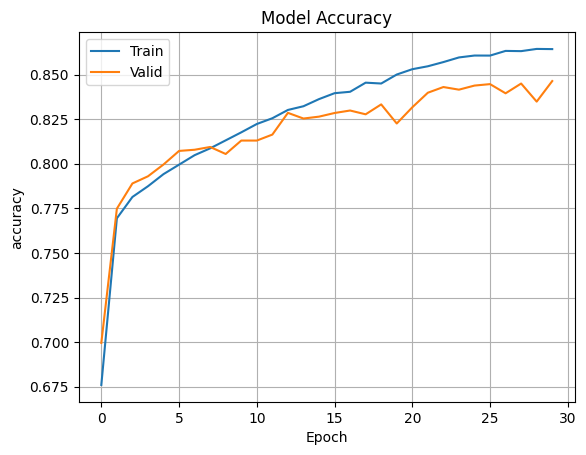

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
epochs = range(1, 20)
plt.plot(history.history['accuracy'][0:])
plt.plot(history.history['val_accuracy'][0:])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
fl = plt.gcf()
fl.savefig('model_acc_poc.png', dpi=100)
# plt.xticks(np.arange(1, 100, 5))
plt.show(epochs)


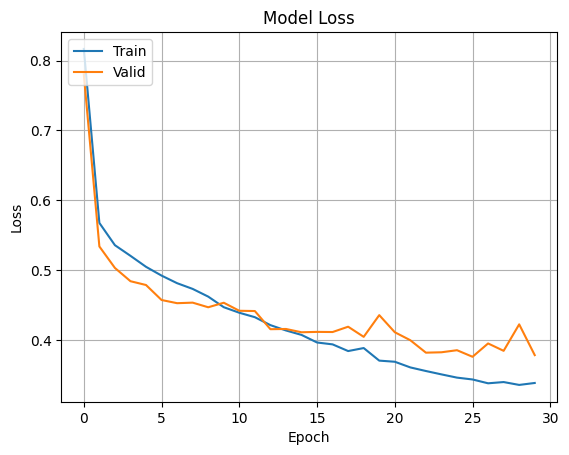

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
epochs = range(1, 20)
plt.plot(history.history['loss'][0:80])
plt.plot(history.history['val_loss'][0:80])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.grid(True)
fl = plt.gcf()
fl.savefig('model_loss_poc.png', dpi=100)
# plt.xticks(np.arange(1, 100, 5))
plt.show(epochs)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert y_test from one-hot encoding to integer labels for evaluation
if y_test.ndim > 1:
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test

y_test = y_test_int

In [ ]:

# Evaluating trained model on test set

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


# Predict the labels for the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# # Ensure y_test is in integer label format
# if y_test.ndim > 1:
#     y_test = np.argmax(y_test, axis=1)

print("Shape of y_pred:", y_pred.shape)
print("Shape of y_test:", y_test.shape)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


637/637 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8460
Accuracy: 84.60
637/637 [==============================] - 1s 2ms/step
Shape of y_pred: (20384,)
Shape of y_test: (20384,)
[[3519  318  674    8]
 [ 899 4405  569    1]
 [ 475  174 3566   22]
 [   0    0    0 5754]]


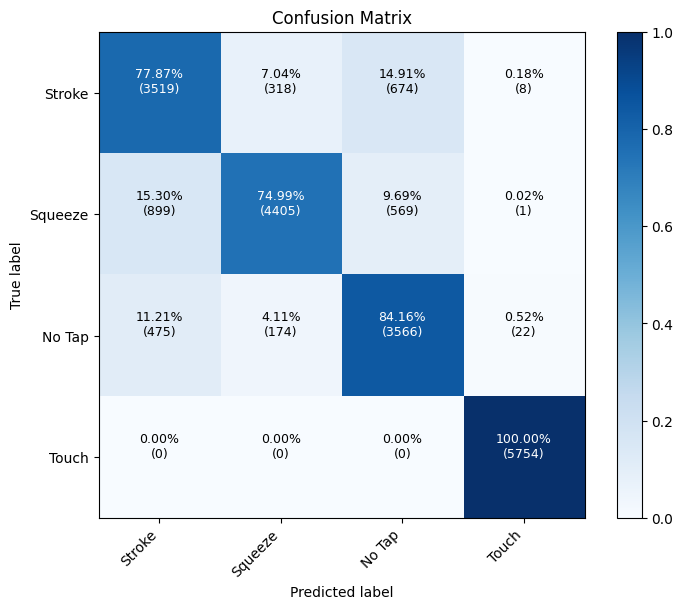

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cf_matrix, classes, normalize=True, title='Confusion Matrix'):
    """
    Plot the confusion matrix.

    Parameters:
    cf_matrix (ndarray): Confusion matrix
    classes (list): List of class labels
    normalize (bool): Whether to normalize the matrix
    title (str): Title of the plot
    """
    if normalize:
        # Calculate row-wise sums to get the total number of samples per true class
        row_sums = np.sum(cf_matrix, axis=1)
        # Normalize the confusion matrix by dividing each element by its corresponding row sum
        cf_matrix = cf_matrix / row_sums[:, np.newaxis]

    plt.figure(figsize=(7.5, 6))
    plt.imshow(cf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2%' if normalize else 'd'
    thresh = cf_matrix.max() / 2.
    for i, j in np.ndindex(cf_matrix.shape):
        plt.text(j, i, f'{cf_matrix[i, j]:{fmt}}\n({cf_matrix[i, j] * row_sums[i] if normalize else cf_matrix[i, j]:.0f})',
                 horizontalalignment="center",
                 color="white" if cf_matrix[i, j] > thresh else "black",
                 fontsize=9 if len(classes) <= 10 else 8)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)
    fl = plt.gcf()
    fl.savefig('confusion_matrix_poc.png', dpi=100)
    plt.show()

# Example usage
classes = ['Stroke', 'Squeeze', 'No Tap', 'Touch']



plot_confusion_matrix(cm, classes)
